### Example 

* Suppose we have two samples that represent Biki ride durations for two distinct neighborhoods `a` and `b`

* Instead of working with actual data, sample the data for the two neighborhoods from a gaussian with a mean ($\mu=20$) the a standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    * In our scenario, this amounts to measuring the duration of 30 bike rides

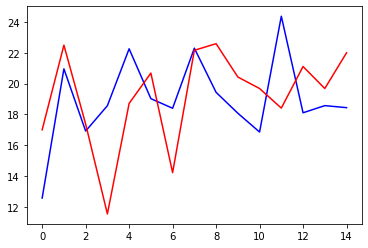

In [6]:
import random

a, b = [random.gauss(20, 4) for i in range(15)], [random.gauss(20, 4) for i in range(15)]

from matplotlib import pyplot as plt

plt.plot(range(15), a, color='b', label='a')
plt.plot(range(15), b, color='r', label='b')

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [44]:
from statistics import mean

print('Mean of a: %.2f, Mean of b %.2f' % (mean(a), mean(b)))

observed = mean(a) - mean(b)

Mean of a: 18.99, Mean of b 19.21


Intuitively, the difference seems to small in order to be statistically significant.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

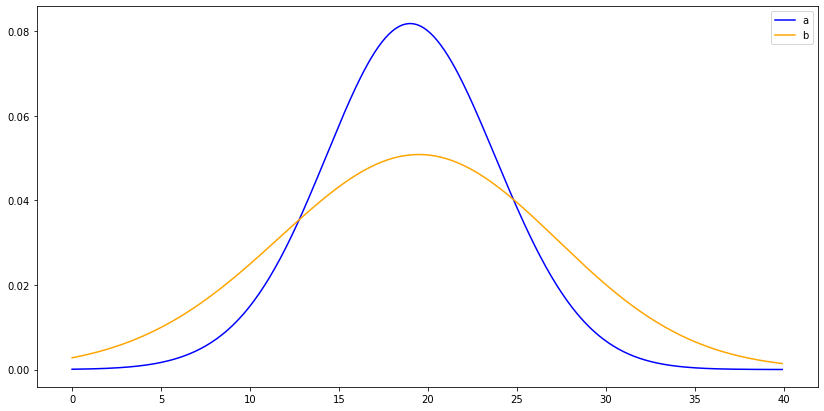

In [43]:
from scipy.stats import gaussian_kde
from scipy import stats
import numpy as np

x_axis = np.arange(0,40, .1)
kde_a = stats.gaussian_kde(a, bw_method = 1.5)
kde_b = stats.gaussian_kde(b, bw_method = 2.3)

y_a = kde_a.evaluate(x_axis)
y_b = kde_b.evaluate(x_axis)

plt.figure(figsize=(14,7))
plt.plot(x_axis, y_a, color='b', label='a')
plt.plot(x_axis, y_b, color='orange', label='b')
plt.legend()

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Yes, a it slightly differs from dataset b.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [51]:
pop  = a + b
bootstrap_diff = []
for i in range(10000):
    np.random.shuffle(pop)
    pseudo_m = pop[:15]
    pseudo_f = pop[15:]
    pseudo_o = np.array(pseudo_m).mean() - np.array(pseudo_f).mean()

    bootstrap_diff.append(pseudo_o)
    
count=0
for i in range(len(bootstrap_diff)):
    if bootstrap_diff[i] > observed: count+=1
pval = count / len(bootstrap_diff)
pval

0.5784

There is not enough evidence (pval = 0.57) to reject the null hypothesis that the mean is statistical significantly from 0. 

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

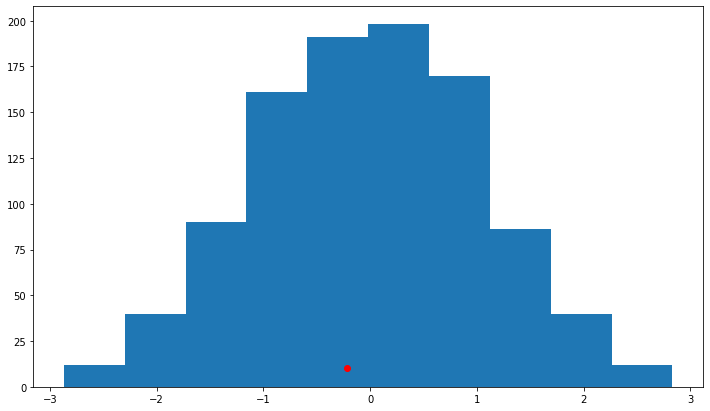

In [47]:
plt.figure(figsize=(12,7))
plt.hist(bootstrap_diff)
plt.plot(observed, 10, color='r', marker="o")